# "I'll Bake What She's Having!" Using Computer Vision and NLP to Recommend Recipes from BonAppetit.Computer
## Tim Dooley, PhD
## Metis Project 5 (Capstone)

In [1]:
import numpy as np
import pandas as pd

The following `csv` was created in the `ba_scrape.ipynb` notebook. 

In [2]:
df = pd.read_csv("ingred.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4989 non-null   int64 
 1   name        4989 non-null   object
 2   date        4989 non-null   object
 3   servs       4989 non-null   object
 4   ings        4989 non-null   object
 5   img_url     4989 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.0+ KB


## Initial NLP to determine coherent topics
BonAppetit.com recipes come with 'topics' that are subjective to the recipe author, often temporal (i.e. 'Holiday 2020'), and not consistent.<br>
The following topic modeling will settle on NMF to create 9 overall topics for use as filters in my CV/image retrieval recipe recommender.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_ws = stop + ['cup', 'cups', 'tbsp', 'tsp', 'tablespoon', 'tablespoons', 'teaspoon', 'teaspoons', 'dash', 'pound', 'kg', 'kilogram', 'ounce', 'ounces', 'temperature', 'large', 'medium', 'small', \
    'dash', 'piece', 'slice', 'chop', 'julienne', 'blend', 'mix', 'knead', 'preferably', 'coarsely', 'fresh', 'freshly']

In [6]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_ws,
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                ngram_range = (1,3),
                                max_df = 0.8, 
                                min_df = 0.01)
dtm_tf = tf_vectorizer.fit_transform(df.ings)
print(dtm_tf.shape)

(4989, 1119)


In [7]:
column_names = tf_vectorizer.get_feature_names()
vectors = pd.DataFrame.sparse.from_spmatrix(dtm_tf)
vectors.columns=column_names
vectors

,active,active dry,active dry yeast,agave,aleppo,aleppo style,aleppo style pepper,allspice,almond,almonds,...,yellow,yogurt,yolk,yolks,yukon,yukon gold,yukon gold potatoes,zest,zest lemon,zest lemon juice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df.ings)
print(dtm_tfidf.shape)

(4989, 1119)


In [9]:
column_names = tfidf_vectorizer.get_feature_names()
vectorsidf = pd.DataFrame.sparse.from_spmatrix(dtm_tfidf)
vectorsidf.columns=column_names
vectorsidf

,active,active dry,active dry yeast,agave,aleppo,aleppo style,aleppo style pepper,allspice,almond,almonds,...,yellow,yogurt,yolk,yolks,yukon,yukon gold,yukon gold potatoes,zest,zest lemon,zest lemon juice
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.18994,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.093111,0.0,0.0
2,0.0,0.0,0.0,0.425601,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.089839,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.198863,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.144344,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4985,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4986,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.112777,0.0,0.0
4987,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


### Below I experiment with clustering and do not find actionable results. 

In [10]:
from sklearn.cluster import KMeans

In [11]:
X = dtm_tf

In [12]:
inertias = []

for k_ in np.arange(1, 20):
    km = KMeans(n_clusters=k_)
    km.fit(X)
    inertias.append(km.inertia_)
inertias

[283811.89015834924,
 268804.8774866081,
 260925.8350093972,
 253584.86086047953,
 248357.0729556229,
 245142.77178915916,
 242383.84990178174,
 240270.99940367395,
 238894.05402213585,
 236907.60712441677,
 235074.6709817533,
 233653.0825528277,
 232674.9746256432,
 231111.6560893378,
 230004.82133384756,
 229285.31697398453,
 228238.95320674588,
 227222.80664867858,
 226495.44897522047]

In [13]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


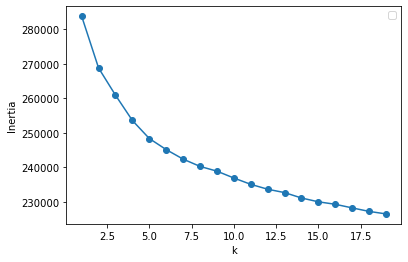

In [14]:
plt.plot(np.arange(1, 20), inertias, marker='o')
#plt.vlines(x=4, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.legend();

Elbow around 6

In [15]:
km = KMeans(n_clusters= 6)
km.fit_transform(X)

array([[ 6.69028439,  8.02865463,  8.67985734,  7.23180057,  7.46281647,
         8.46419661],
       [ 8.58127661, 10.18411317, 10.90853672,  9.60457141,  9.51776552,
        10.52058734],
       [ 6.14343198,  5.44843706,  7.32874199,  3.79308107,  4.92488854,
         6.25145994],
       ...,
       [ 7.68701592,  7.54804789,  8.10068969,  6.92592576,  7.09649888,
         8.16451754],
       [ 6.09270603,  6.3091215 ,  6.20632701,  5.68834775,  5.23912563,
         7.10883963],
       [ 7.25410051,  6.75683149,  8.30504979,  5.48881919,  6.26201728,
         7.47596923]])

## NMF
The model I settled on was non-negative matrix factorization. It provided rather coherent topics. <br> *Note*: I chose to be somewhat vague in naming these categories. I chose to name most for their prominent ingredient(s). This is because I did not want to impose too much of my own bias on the topics. The full list of associated words after NMF is avaliable below. 

In [16]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    """
    This function enumerates components (words in model) of each DR model. 
    This aids in the building of models by allowing the model maker to consider the components of the reduction. 
    """
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
from sklearn.decomposition import NMF

In [18]:
doc_word = tfidf_vectorizer.fit_transform(df.ings)
pd.DataFrame(doc_word.toarray(), columns=tfidf_vectorizer.get_feature_names()).head(10)

,active,active dry,active dry yeast,agave,aleppo,aleppo style,aleppo style pepper,allspice,almond,almonds,...,yellow,yogurt,yolk,yolks,yukon,yukon gold,yukon gold potatoes,zest,zest lemon,zest lemon juice
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.189940,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.093111,0.0,0.0
2,0.0,0.0,0.0,0.425601,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.089839,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.198863,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.144344,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.109169,...,0.0,0.0,0.121666,0.000000,0.0,0.0,0.0,0.158479,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.089825,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [19]:
nmf_model = NMF(9)
doc_topic = nmf_model.fit_transform(doc_word)

In [20]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2", "component_3", "component_4", "component_5", "component_6","component_7", "component_8", "component_9"],
             columns = tf_vectorizer.get_feature_names())
topic_word

,active,active dry,active dry yeast,agave,aleppo,aleppo style,aleppo style pepper,allspice,almond,almonds,...,yellow,yogurt,yolk,yolks,yukon,yukon gold,yukon gold potatoes,zest,zest lemon,zest lemon juice
component_1,0.000,0.000,0.000,0.000,0.012,0.000,0.000,0.009,0.000,0.049,...,0.046,0.009,0.026,0.000,0.072,0.072,0.060,0.000,0.000,0.000
component_2,0.074,0.074,0.074,0.012,0.000,0.000,0.000,0.027,0.104,0.070,...,0.017,0.022,0.085,0.191,0.009,0.009,0.008,0.046,0.000,0.000
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.002,...,0.042,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,...,0.037,0.008,0.001,0.000,0.035,0.035,0.025,0.000,0.000,0.000
component_5,0.000,0.000,0.000,0.041,0.037,0.020,0.025,0.003,0.016,0.011,...,0.000,0.191,0.032,0.022,0.000,0.000,0.000,0.708,0.382,0.356
component_6,0.035,0.035,0.035,0.000,0.031,0.066,0.050,0.000,0.000,0.053,...,0.001,0.168,0.000,0.013,0.012,0.012,0.011,0.000,0.000,0.000
component_7,0.023,0.023,0.023,0.012,0.037,0.024,0.022,0.000,0.007,0.032,...,0.000,0.009,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000
component_8,0.000,0.000,0.000,0.058,0.000,0.007,0.006,0.023,0.010,0.011,...,0.004,0.024,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.000,0.000,0.000,0.000,0.131,0.032,0.012,0.012,0.000,0.016,...,0.026,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [21]:
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 40)


Topic  0
ground, pepper, salt ground, black pepper, ground black, ground black pepper, kosher salt ground, black, salt ground black, oil, olive, olive oil, salt ground pepper, ground pepper, vinegar, mustard, wine, wine vinegar, divided, oil kosher, oil kosher salt, pounds, olive oil kosher, leaves, halved, oil divided, olive oil divided, red wine, dijon, slices, dijon mustard, thyme, thick, red wine vinegar, white wine, cut, parsley, white, white wine vinegar, flat

Topic  1
sugar, flour, butter, unsalted butter, unsalted, purpose, purpose flour, vanilla, baking, room, cream, extract, plus, powder, egg, vanilla extract, granulated, granulated sugar, baking powder, sticks, eggs, milk, stick, butter room, heavy, unsalted butter room, heavy cream, chocolate, pan, brown, brown sugar, butter cut, unsalted butter cut, light, flour plus, cut pieces, butter cut pieces, chilled, pieces, cut

Topic  2
sliced, thinly, thinly sliced, inch, leaves, red, onion thinly sliced, onion thinly, cut, pie

In [22]:
nmf_index = ['chicken_butter_herbs', 'baked', 'onions_garlic', 'gar_chick_shall_chile', 'cocktails', 'evo_greek_tomatoes', 'dijon_parsley_snp', 'asian', 'spicy']
H = pd.DataFrame(doc_topic.round(5),
             columns = nmf_index)
H

,chicken_butter_herbs,baked,onions_garlic,gar_chick_shall_chile,cocktails,evo_greek_tomatoes,dijon_parsley_snp,asian,spicy
0,0.01090,0.11162,0.00000,0.01472,0.00404,0.00000,0.00000,0.03437,0.00857
1,0.02363,0.12420,0.00000,0.00000,0.01680,0.00000,0.00000,0.01770,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.06251,0.00000,0.00000,0.04886,0.04934
3,0.00800,0.06910,0.03322,0.03579,0.03063,0.00935,0.00000,0.01047,0.00000
4,0.00000,0.06152,0.01280,0.00295,0.01824,0.00472,0.00000,0.01418,0.01444
...,...,...,...,...,...,...,...,...,...
4984,0.01743,0.01372,0.05797,0.03637,0.00000,0.00040,0.00219,0.00000,0.00192
4985,0.06525,0.02486,0.00000,0.03846,0.00000,0.00000,0.00191,0.00000,0.00527
4986,0.00000,0.03236,0.00000,0.04328,0.04796,0.00000,0.00000,0.00000,0.10333
4987,0.06926,0.06414,0.00000,0.06378,0.02494,0.00000,0.00000,0.00000,0.00000


**Add the labels to the `df`**

In [26]:
H['nmf_label'] = H.idxmax(axis=1)

In [27]:
df['nmf_label']= H.nmf_label

In [28]:
df.nmf_label

0                      baked
1                      baked
2                  cocktails
3                      baked
4                      baked
                ...         
4984           onions_garlic
4985    chicken_butter_herbs
4986                   spicy
4987    chicken_butter_herbs
4988               cocktails
Name: nmf_label, Length: 4989, dtype: object

**Let's have a look at the counts, and graph them with a seaborn countplot**

In [24]:
import seaborn as sns

In [26]:
df.nmf_label.value_counts()

baked                    950
onions_garlic            689
gar_chick_shall_chile    591
cocktails                588
asian                    547
chicken_butter_herbs     496
evo_greek_tomatoes       450
spicy                    384
dijon_parsley_snp        294
Name: nmf_label, dtype: int64

(0.0, 996.45)

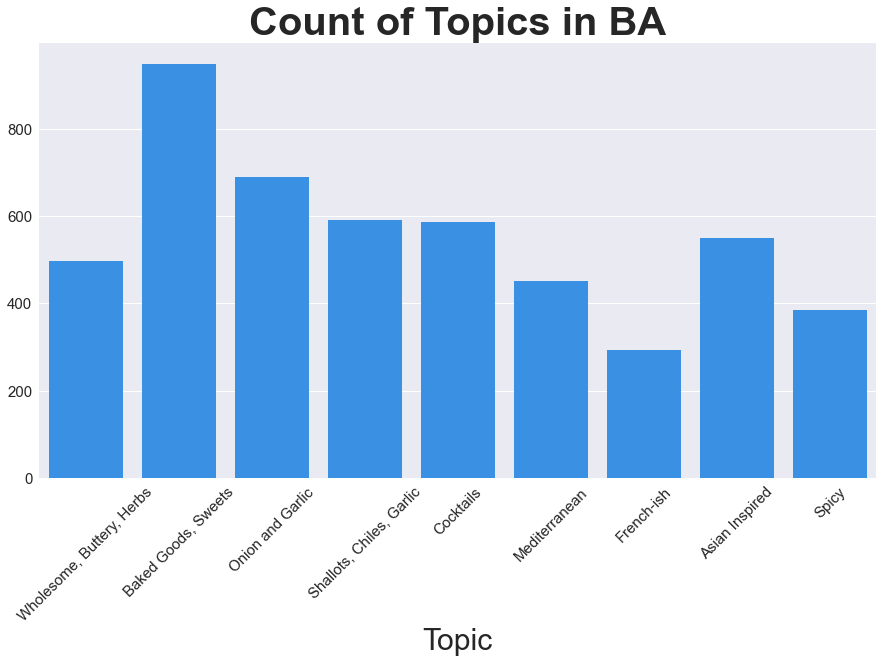

In [60]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn')
ax = sns.countplot('nmf_label', data = df, order = nmf_index, color = 'dodgerblue')
ax.set_xticklabels(rotation = 45, labels= nmf_index)
ax.set_xlabel('Topic', size = 30)
ax.set_ylabel(None)
ax.tick_params(labelsize=15)
ax.set_title('Count of Topics in BA', size = 40, weight = 'bold')
ax.set_xticklabels(['Wholesome, Buttery, Herbs', 'Baked Goods, Sweets',  'Onion and Garlic', 'Shallots, Chiles, Garlic', 'Cocktails', 'Mediterranean', 'French-ish', 'Asian Inspired', 'Spicy'])
ax.set_ylim()

In [28]:
df[df.nmf_label == 'cocktails']

,Unnamed: 0,name,date,servs,ings,img_url,nmf_label
2,2,"Tequila, Beer, and Citrus Cocktail","December 1, 2020",Makes 1,"['oz. fresh grapefruit juice', 'oz. fresh lime...",https://assets.bonappetit.com/photos/5fb7e3b35...,cocktails
10,10,Sparkling Wine Cocktail,"December 1, 2020",Makes 1,"['lemons, scrubbed', 'cup sugar', 'cup sugar',...",https://assets.bonappetit.com/photos/5fb7e3b35...,cocktails
15,15,Sweet Potatoes With Maple Tahini,"December 1, 2020",4 Servings,['lb. Okinawan or Japanese sweet potatoes (abo...,https://assets.bonappetit.com/photos/5fbd5d1be...,cocktails
21,21,Amaro Cocktail,"December 1, 2020",Makes 1,"['cups raw pecans', 'tsp. black peppercorns', ...",https://assets.bonappetit.com/photos/5fb7e7445...,cocktails
64,64,Smashed Green Beans With Lemony Sumac Dressing,"October 20, 2020",4 - 6 Servings,"['cup extra-virgin olive oil', 'cup raw pumpki...",https://assets.bonappetit.com/photos/5f8087135...,cocktails
...,...,...,...,...,...,...,...
4975,4975,Celery Salad with Celery Root and Horseradish,"December 10, 2012",6 Servings,"['medium celery root (about 1 pound)', 'large ...",https://assets.bonappetit.com/photos/57ae36fc1...,cocktails
4977,4977,Moxie's Cold Cure-All,"December 10, 2012",Makes 1 Servings,"['tablespoon fresh lemon juice', 'teaspoons ho...",https://assets.bonappetit.com/photos/57ae386e5...,cocktails
4978,4978,Blackberry and Yogurt Breakfast Smoothie,"December 10, 2012",Makes 2 Servings,"['banana', 'cups (packed) spinach leaves', 'cu...",https://assets.bonappetit.com/photos/57ae36a61...,cocktails
4980,4980,Indian-Style Cauliflower,"December 10, 2012",8 Servings,"['tablespoons olive oil', 'teaspoon coriander ...",https://assets.bonappetit.com/photos/57ae39cf1...,cocktails


## PCA SVD
<br><br>
I leave this here for the sake of rigor. Ultimately I did not find these results useful and kept with my NMF topic modeling. 

In [29]:
from sklearn.decomposition import PCA, TruncatedSVD

In [30]:
pca = PCA(n_components=2)
svd = TruncatedSVD(9)

In [31]:
result = svd.fit(dtm_tf)

In [32]:
sum(result.explained_variance_ratio_)

0.2920105569702929

In [33]:
result_fit = result.transform(dtm_tf)

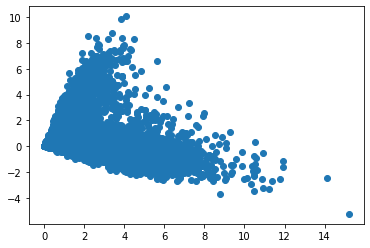

In [34]:
plt.scatter(result_fit[:, 0], result_fit[:, 1])

In [35]:
display_topics(svd, tf_vectorizer.get_feature_names(), 50)


Topic  0
chopped, oil, finely, ground, pepper, sliced, plus, thinly, thinly sliced, olive, olive oil, garlic, finely chopped, red, black, divided, leaves, grated, serving, lemon, salt ground, cut, kosher salt ground, black pepper, cloves, ground black, ground black pepper, finely grated, sugar, juice, peeled, garlic cloves, pieces, seeds, white, vinegar, butter, unsalted, removed, vegetable, onion, inch, unsalted butter, vegetable oil, wine, crushed, halved, virgin, lemon juice, whole

Topic  1
sugar, butter, unsalted, unsalted butter, flour, plus, purpose, purpose flour, room, vanilla, baking, powder, cream, egg, extract, granulated, vanilla extract, granulated sugar, cut, brown, pieces, eggs, brown sugar, baking powder, cut pieces, milk, light, stick, sticks, butter cut, unsalted butter cut, butter room, unsalted butter room, butter cut pieces, pan, whole, chilled, flour plus, divided, chocolate, heavy, light brown, light brown sugar, heavy cream, purpose flour plus, packed, stick u

In [ ]:
svd_index = ['veg_oo_gar_wine', 'baked', 'pepper_parm_herbs', 'soy_fish_gar_coco', 'citr_gar_sesam_parm', 'dd']

In [36]:
df.nmf_label

0                      baked
1                      baked
2                  cocktails
3                      baked
4                      baked
                ...         
4984           onions_garlic
4985    chicken_butter_herbs
4986                   spicy
4987    chicken_butter_herbs
4988               cocktails
Name: nmf_label, Length: 4989, dtype: object

In [37]:
dfx = pd.read_csv('image_db.csv')

In [38]:
dfx = dfx.rename(columns = {'Unnamed: 0': 'name', '0': 'file', '1': 'array'})

In [39]:
df.drop(columns = 'Unnamed: 0', inplace= True)

In [40]:
df.columns, dfx.columns

(Index(['name', 'date', 'servs', 'ings', 'img_url', 'nmf_label'], dtype='object'),
 Index(['name', 'file', 'array'], dtype='object'))

In [41]:
labels = df[['name', 'nmf_label']]

In [42]:
labels

,name,nmf_label
0,Nan-e Berenji,baked
1,Ginger-Citrus Cookies,baked
2,"Tequila, Beer, and Citrus Cocktail",cocktails
3,Corn and Crab Beignets With Yaji Aioli,baked
4,Swedish Glögg,baked
...,...,...
4984,Vegetable Stock,onions_garlic
4985,Roast Beef Tenderloin with Horseradish Cream,chicken_butter_herbs
4986,Roasted Fresh Ham with Citrus and Rye,spicy
4987,Nutmeg and Black Pepper Popovers,chicken_butter_herbs


## Computer Vision and Image Retrieval Model
<br><br>
The following is my building process to create the image retrieval/reverse image search model. 
<br> 
A large amount of credit for help in creating this model goes to Koul, Ganju, Kassam Ch. 4 *Practical Deep Learning for Cloud, Mobile, and Edge*
<br>
Their clear walkthrough was a great help in using k-NN on binarized weights. I adapted some of their code for the specific purpose of searching through the images I scraped from BonAppetit.com 

In [43]:
from PIL import Image

In [44]:
import pickle

In [45]:
with open('image_db.pickle', 'rb') as to_read:
  df_ims = pickle.load(to_read)

In [46]:
df_ims = df_ims.reset_index()

In [47]:
df_ims.head(3)

,index,0,1
0,Nan-e Berenji,nan_e_berenji,"[[[108, 46, 47], [113, 47, 49], [128, 49, 58],..."
1,Ginger-Citrus Cookies,ginger_citrus_cookies,"[[[221, 162, 92], [210, 119, 34], [212, 124, 4..."
2,"Tequila, Beer, and Citrus Cocktail","tequila,_beer,_and_citrus_cocktail","[[[117, 56, 38], [121, 60, 42], [121, 60, 42],..."


In [48]:
df_ims = df_ims.rename(columns = {'index': 'name', 0:'file', 1:'img'})

In [49]:
w_labels = df_ims.join(labels, how = 'right', rsuffix= '_r').dropna()

In [50]:
w_labels.head()

,name,file,img,name_r,nmf_label
0,Nan-e Berenji,nan_e_berenji,"[[[108, 46, 47], [113, 47, 49], [128, 49, 58],...",Nan-e Berenji,baked
1,Ginger-Citrus Cookies,ginger_citrus_cookies,"[[[221, 162, 92], [210, 119, 34], [212, 124, 4...",Ginger-Citrus Cookies,baked
2,"Tequila, Beer, and Citrus Cocktail","tequila,_beer,_and_citrus_cocktail","[[[117, 56, 38], [121, 60, 42], [121, 60, 42],...","Tequila, Beer, and Citrus Cocktail",cocktails
3,Corn and Crab Beignets With Yaji Aioli,corn_and_crab_beignets_with_yaji_aioli,"[[[65, 46, 42], [68, 48, 40], [145, 107, 91], ...",Corn and Crab Beignets With Yaji Aioli,baked
4,Swedish Glögg,swedish_glögg,"[[[246, 230, 214], [243, 234, 219], [243, 235,...",Swedish Glögg,baked


In [51]:
import cv2

In [52]:
X = w_labels['img']
Y = w_labels[['nmf_label']]

In [98]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
transf = le.fit_transform(Y)

In [96]:
le.classes_

array(['asian', 'baked', 'chicken_butter_herbs', 'cocktails',
       'dijon_parsley_snp', 'evo_greek_tomatoes', 'gar_chick_shall_chile',
       'onions_garlic', 'spicy'], dtype=object)

In [99]:
from keras.utils import to_categorical
encoded_label = to_categorical(transf)

In [101]:
encoded_label.shape

(4949, 9)

In [1]:
from keras.utils.np_utils import to_categorical
categorical_labels = to_categorical(Y, num_classes=9)

In [53]:
tensor = np.zeros((X.shape[0],224,224,3))
# Iterating through image arrays to update tensor
for idx, i in enumerate(X):
    tensor[idx] = cv2.resize(i,(224,224))

In [54]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, x_test, y_train, y_test = train_test_split(tensor, encoded_label, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [79]:
from keras.utils import np_utils

In [2]:
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
y_val_cat = np_utils.to_categorical(y_val)

In [3]:
with open('X_train.pickle', 'wb') as to_write:
    pickle.dump(X_train, to_write) 
with open('X_test.pickle', 'wb') as to_write:
    pickle.dump(X_test, to_write) 
with open('y_train.pickle', 'wb') as to_write:
    pickle.dump(y_train, to_write)
with open('y_test.pickle', 'wb') as to_write:
    pickle.dump(y_test, to_write) 

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

### Trying to build my own weights ontop of ResNet50
<br>
Ultimately this practice resulted in worse results than just using ResNet50 out of the box. It is left below to demonstrate the entire process.

In [103]:
image_size=224
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
model = models.Sequential()
# Add the vgg convolutional base model
model.add(vgg_conv)
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(keras.layers.BatchNormalization())
model.add(layers.Dense(9, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters
model.summary()

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fda6d8707c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6dacbb50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6daa8160> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fda6daa8820> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6daa30d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6d8faa60> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fda6d9b43a0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6d995670> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6d96b3d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fda6d9f1370> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fda6d9b4310> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [63]:
import tensorflow as tf

In [64]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard

rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience = 3)
estop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 4)
tboard = tf.keras.callbacks.TensorBoard(log_dir='./logs')

In [61]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

In [107]:
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [109]:
len(extract_features('ba_images/adare_manor_scones.jpg', model))

9

In [110]:
extensions = ['.jpg']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [111]:
root_dir = '/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images'
filenames = sorted(get_file_list(root_dir))

In [112]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

In [113]:
pickle.dump(feature_list, open('data/features_mymodel.pickle', 'wb'))
pickle.dump(filenames, open('data/filenames.pickle','wb'))

In [139]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute',
metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[1]])

In [140]:
listed = list(indices[0])

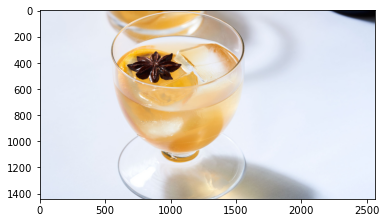

In [141]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(filenames[3]))

In [142]:
for i in range(5):
    print(distances[0][i])

0.0
0.03575236
0.070363596
0.071239516
0.0969005


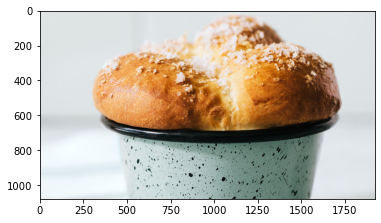

In [146]:
plt.imshow(mpimg.imread(filenames[listed[3]]))

In [147]:
resnet = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))

94773248/94765736 [==============================] - 3s 0us/step


### Now with just out-of-the-box ResNet50
<br>

This ultimately became my main model to use in my app, found at ba_app.py

In [148]:
feature_list2 = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list2.append(extract_features(filenames[i], resnet))

In [149]:
pickle.dump(feature_list2, open('data/featuresRESNET_mymodel.pickle', 'wb'))

In [387]:
neighbors2 = NearestNeighbors(n_neighbors=20, algorithm='brute',
metric='euclidean').fit(feature_list2)
distances2, indices2 = neighbors2.kneighbors([feature_list2[31]])

In [385]:
feature_list2[31].shape

(100352,)

In [367]:
listed2 = list(indices2[0])

In [327]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

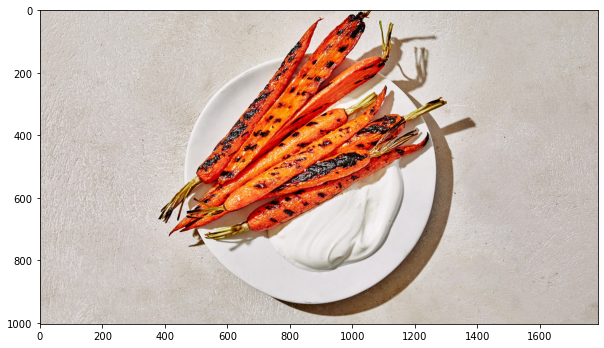

In [365]:
plt.figure(figsize=(10,8))
plt.imshow(mpimg.imread(filenames[31]))

In [368]:
for i in range(20):
    print(distances2[0][i])

9.1856926e-08
1.0878714
1.1157979
1.1185547
1.1233665
1.1252633
1.1289402
1.1317068
1.1324098
1.1348819
1.1356161
1.135802
1.1395831
1.1399518
1.1405144
1.1417066
1.1417634
1.142181
1.1429349
1.1431023


In [419]:
print(df[df.name ==w_labels[w_labels.file == filenames[listed2[15]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')].name.to_string(index = False).strip()].name.to_string(index = False).strip())

Crispy-Skinned Fish with Herb Sauce


In [446]:
df2 = pd.read_csv('ba5k.csv')
link = df2[['name','url']]

In [451]:
df

,name,date,servs,ings,img_url,nmf_label
0,Nan-e Berenji,"December 1, 2020",Makes about 50,"['tsp. baking powder', 'tsp. ground cardamom',...",https://assets.bonappetit.com/photos/5fb7e3af5...,baked
1,Ginger-Citrus Cookies,"December 1, 2020",Makes about 28,"['cups 1""–2""-wide strips lemon, lime, orange, ...",https://assets.bonappetit.com/photos/5fb7e3ae5...,baked
2,"Tequila, Beer, and Citrus Cocktail","December 1, 2020",Makes 1,"['oz. fresh grapefruit juice', 'oz. fresh lime...",https://assets.bonappetit.com/photos/5fb7e3b35...,cocktails
3,Corn and Crab Beignets With Yaji Aioli,"December 1, 2020",8 - 10 Servings,"['cup unsalted dry-roasted peanuts', 'Tbsp. gr...",https://assets.bonappetit.com/photos/5fbc26d57...,baked
4,Swedish Glögg,"December 1, 2020",Makes about 1½ quarts,"['cinnamon sticks, broken into pieces', 'tsp. ...",https://assets.bonappetit.com/photos/5fbd604d2...,baked
...,...,...,...,...,...,...
4984,Vegetable Stock,"December 10, 2012",2 quarts,"['tablespoon olive oil', 'medium onions, unpee...",https://assets.bonappetit.com/photos/57ae399f5...,onions_garlic
4985,Roast Beef Tenderloin with Horseradish Cream,"November 13, 2012",8 to 10 Servings,['cup plus 2 tablespoons crème fraîche or sour...,https://assets.bonappetit.com/photos/57ae3cda5...,chicken_butter_herbs
4986,Roasted Fresh Ham with Citrus and Rye,"November 13, 2012",14 Servings,"['12-pound fresh ham, cut from the shank end',...",https://assets.bonappetit.com/photos/57ae3cfff...,spicy
4987,Nutmeg and Black Pepper Popovers,"November 13, 2012",Makes 12 Servings,"['cups all-purpose flour', 'tablespoons finely...",https://assets.bonappetit.com/photos/57ae3c8bf...,chicken_butter_herbs


In [463]:
df = pd.merge(df,link, on = 'name')

In [464]:
df

,name,date,servs,ings,img_url,nmf_label,url
0,Nan-e Berenji,"December 1, 2020",Makes about 50,"['tsp. baking powder', 'tsp. ground cardamom',...",https://assets.bonappetit.com/photos/5fb7e3af5...,baked,/recipe/nan-e-berenji
1,Ginger-Citrus Cookies,"December 1, 2020",Makes about 28,"['cups 1""–2""-wide strips lemon, lime, orange, ...",https://assets.bonappetit.com/photos/5fb7e3ae5...,baked,/recipe/ginger-citrus-cookies
2,"Tequila, Beer, and Citrus Cocktail","December 1, 2020",Makes 1,"['oz. fresh grapefruit juice', 'oz. fresh lime...",https://assets.bonappetit.com/photos/5fb7e3b35...,cocktails,/recipe/tequila-beer-and-citrus-cocktail
3,Corn and Crab Beignets With Yaji Aioli,"December 1, 2020",8 - 10 Servings,"['cup unsalted dry-roasted peanuts', 'Tbsp. gr...",https://assets.bonappetit.com/photos/5fbc26d57...,baked,/recipe/corn-and-crab-beignets-with-yaji-aioli
4,Swedish Glögg,"December 1, 2020",Makes about 1½ quarts,"['cinnamon sticks, broken into pieces', 'tsp. ...",https://assets.bonappetit.com/photos/5fbd604d2...,baked,/recipe/swedish-glogg
...,...,...,...,...,...,...,...
4993,Vegetable Stock,"December 10, 2012",2 quarts,"['tablespoon olive oil', 'medium onions, unpee...",https://assets.bonappetit.com/photos/57ae399f5...,onions_garlic,/recipe/vegetable-stock
4994,Roast Beef Tenderloin with Horseradish Cream,"November 13, 2012",8 to 10 Servings,['cup plus 2 tablespoons crème fraîche or sour...,https://assets.bonappetit.com/photos/57ae3cda5...,chicken_butter_herbs,/recipe/roast-beef-tenderloin-with-horseradish...
4995,Roasted Fresh Ham with Citrus and Rye,"November 13, 2012",14 Servings,"['12-pound fresh ham, cut from the shank end',...",https://assets.bonappetit.com/photos/57ae3cfff...,spicy,/recipe/roasted-fresh-ham-with-citrus-and-rye
4996,Nutmeg and Black Pepper Popovers,"November 13, 2012",Makes 12 Servings,"['cups all-purpose flour', 'tablespoons finely...",https://assets.bonappetit.com/photos/57ae3c8bf...,chicken_butter_herbs,/recipe/nutmeg-black-pepper-popovers


In [444]:
df_labels = w_labels[['name','file']]

In [465]:
df = pd.merge(df, df_labels, on = 'name')

In [466]:
df

,name,date,servs,ings,img_url,nmf_label,url,file
0,Nan-e Berenji,"December 1, 2020",Makes about 50,"['tsp. baking powder', 'tsp. ground cardamom',...",https://assets.bonappetit.com/photos/5fb7e3af5...,baked,/recipe/nan-e-berenji,nan_e_berenji
1,Ginger-Citrus Cookies,"December 1, 2020",Makes about 28,"['cups 1""–2""-wide strips lemon, lime, orange, ...",https://assets.bonappetit.com/photos/5fb7e3ae5...,baked,/recipe/ginger-citrus-cookies,ginger_citrus_cookies
2,"Tequila, Beer, and Citrus Cocktail","December 1, 2020",Makes 1,"['oz. fresh grapefruit juice', 'oz. fresh lime...",https://assets.bonappetit.com/photos/5fb7e3b35...,cocktails,/recipe/tequila-beer-and-citrus-cocktail,"tequila,_beer,_and_citrus_cocktail"
3,Corn and Crab Beignets With Yaji Aioli,"December 1, 2020",8 - 10 Servings,"['cup unsalted dry-roasted peanuts', 'Tbsp. gr...",https://assets.bonappetit.com/photos/5fbc26d57...,baked,/recipe/corn-and-crab-beignets-with-yaji-aioli,corn_and_crab_beignets_with_yaji_aioli
4,Swedish Glögg,"December 1, 2020",Makes about 1½ quarts,"['cinnamon sticks, broken into pieces', 'tsp. ...",https://assets.bonappetit.com/photos/5fbd604d2...,baked,/recipe/swedish-glogg,swedish_glögg
...,...,...,...,...,...,...,...,...
4953,Vegetable Stock,"December 10, 2012",2 quarts,"['tablespoon olive oil', 'medium onions, unpee...",https://assets.bonappetit.com/photos/57ae399f5...,onions_garlic,/recipe/vegetable-stock,vegetable_stock
4954,Roast Beef Tenderloin with Horseradish Cream,"November 13, 2012",8 to 10 Servings,['cup plus 2 tablespoons crème fraîche or sour...,https://assets.bonappetit.com/photos/57ae3cda5...,chicken_butter_herbs,/recipe/roast-beef-tenderloin-with-horseradish...,roast_beef_tenderloin__with_horseradish_cream
4955,Roasted Fresh Ham with Citrus and Rye,"November 13, 2012",14 Servings,"['12-pound fresh ham, cut from the shank end',...",https://assets.bonappetit.com/photos/57ae3cfff...,spicy,/recipe/roasted-fresh-ham-with-citrus-and-rye,roasted_fresh_ham_with_citrus_and_rye
4956,Nutmeg and Black Pepper Popovers,"November 13, 2012",Makes 12 Servings,"['cups all-purpose flour', 'tablespoons finely...",https://assets.bonappetit.com/photos/57ae3c8bf...,chicken_butter_herbs,/recipe/nutmeg-black-pepper-popovers,nutmeg_and_black_pepper_popovers


In [505]:
df.to_csv('w_urls.csv')

In [475]:
(df[df.name ==w_labels[w_labels.file == filenames[listed2[15]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')].name.to_string(index = False).strip()].name.to_string(index = False).strip())

'Crispy-Skinned Fish with Herb Sauce'

### Building calls to the df/csv for use in the main app

In [480]:
df[df.file == filenames[listed2[15]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')].name.to_string(index = False).strip()

'Crispy-Skinned Fish with Herb Sauce'

In [482]:
get_url = df[df.file == filenames[listed2[15]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')].url.to_string(index = False).strip()
f"www.bonappetit.com{get_url}"

'www.bonappetit.com/recipe/crispy-skinned-fish-with-herb-sauce'

In [468]:
df[df.name == 'Brown Butter–Basted Steak']

,name,date,servs,ings,img_url,nmf_label,url,file
1141,Brown Butter–Basted Steak,"March 20, 2018",2 servings,"['1¾""-thick bone-in rib eye (about 1½ lb.)', '...",https://assets.bonappetit.com/photos/5ab520846...,dijon_parsley_snp,/recipe/brown-butter-basted-steak,brown_butter–basted_steak


In [469]:
df[df.file == filenames[listed2[15]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')]

,name,date,servs,ings,img_url,nmf_label,url,file
1149,Crispy-Skinned Fish with Herb Sauce,"March 20, 2018",4 servings,"['oil-packed anchovy fillets (optional)', 'sma...",https://assets.bonappetit.com/photos/5ab521a62...,dijon_parsley_snp,/recipe/crispy-skinned-fish-with-herb-sauce,crispy_skinned_fish_with_herb_sauce


(<matplotlib.image.AxesImage at 0x7fd8803d6e50>,
 '/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/crispy_skinned_fish_with_herb_sauce.jpg')

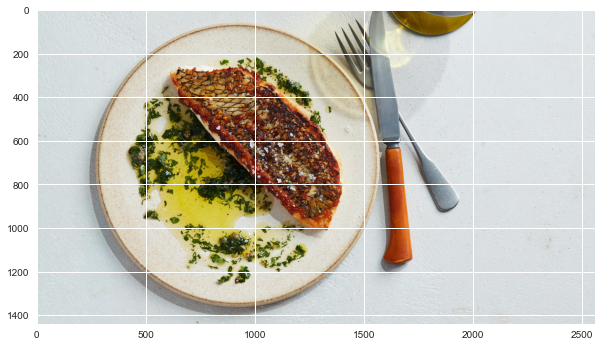

In [438]:
plt.figure(figsize=(10,8))
plt.imshow(mpimg.imread(filenames[listed2[15]])), filenames[listed2[15]]

In [191]:
import random

In [373]:
num_images = 5

In [396]:
def clean_image(imgin, model):
    """This function takes the image or image from path and a model to produce normalized features
    params: imgin, model
    returns: normalized_features
    credit to the aforementioned book by Koul, Ganju, Kassam
    their work helped me realize the need to flatten and normalize 
    note: input shape is set to (224,224,3)
    """
    input_shape = (224, 224, 3) # standard ResNet50 size, 3 color channels
    img_array = image.img_to_array(imgin)
    expand = np.expand_dims(img_array, axis=0)
    preprocessed= preprocess_input(expand)
    features = model.predict(preprocessed)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)

    return normalized_features

In [402]:
t_im = cv2.imread('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/“tater_tots”_with_spicy_mayonnaise.jpg')

In [403]:
rsized = cv2.resize(src =t_im, dsize=(224,224))

In [406]:
rsized.shape

(224, 224, 3)

In [407]:
clean_image(rsized, model)

array([0.10474314, 0.3004953 , 0.3631856 , 0.75030357, 0.1349507 ,
       0.20439576, 0.18487085, 0.27443793, 0.18544427], dtype=float32)

In [ ]:
distances2, indices2 = neighbors2.kneighbors([feature_list2[31]])

In [ ]:
def clean_image(imgin, model):
    input_shape = (224, 224, 3)
    img_array = imgx.img_to_array(imgin)
    expanded = np.expand_dims(img_array, axis=0)
    preprocessed = preprocess_input(expanded)
    features = model.predict(preprocessed)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

# The following function calls back to clean_image to then find neighbors based on the binarized feature_list created above
def get_knn(img_array):
    neighbors = NearestNeighbors(n_neighbors=20, algorithm='brute', metric='euclidean').fit(feature_list)
    distances, indices = neighbors.kneighbors([clean_image(img_array,model)])
    return distances, indices


uploaded_file = st.file_uploader("Choose an image...")
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    t_im = cv2.imread('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/“tater_tots”_with_spicy_mayonnaise.jpg')
    rsized = cv2.resize(src =t_im, dsize=(224,224))
    distances, indices = get_knn(rsized)

## Add dietary restrictions

In [504]:
df['meat'] = np.where(df['ings'].str.contains('pork') | df['ings'].str.contains('beef') |df['ings'].str.contains('steak') | df['ings'].str.contains('chicken') | df['ings'].str.contains('breast') | df['ings'].str.contains('thigh') | df['ings'].str.contains('veal') | df['ings'].str.contains('fowl') | df['ings'].str.contains('pheasant') | df['ings'].str.contains('turkey') | df['ings'].str.contains('ham') | df['ings'].str.contains('bison') | df['ings'].str.contains('carnivore') |df['ings'].str.contains('bacon') | df['ings'].str.contains('guanc') | df['ings'].str.contains('lardon') |df['ings'].str.contains('ribs') |df['ings'].str.contains('sausage') |df['ings'].str.contains('brisket'), 1,0)

In [491]:
df.sample(5)

,name,date,servs,ings,img_url,nmf_label,url,file,meat
625,Smoky Eggplant Dip (Eggplant Moutabal),"April 16, 2019",4 servings,['medium globe eggplants (about 1¾ lb. total)'...,https://assets.bonappetit.com/photos/5cad1cb42...,evo_greek_tomatoes,/recipe/smoky-eggplant-dip-eggplant-moutabal,smoky_eggplant_dip_(eggplant_moutabal),0
4410,Pumpkin Seed Brittle,"October 15, 2013",16 Servings,"['Nonstick vegetable oil spray', 'cup sugar', ...",https://assets.bonappetit.com/photos/57addc3c1...,dijon_parsley_snp,/recipe/pumpkin-seed-brittle,pumpkin_seed_brittle,0
2321,Fried Fish Sandwiches with Lobster Mayo,"July 19, 2016",Makes 8 Servings,"['cup small pieces cooked lobster meat', 'cup ...",https://assets.bonappetit.com/photos/57aca5815...,baked,/recipe/fried-fish-sandwiches-with-lobster-mayo,fried_fish_sandwiches_with_lobster_mayo,1
3044,Brandied Cherries with Vanilla Bean,"July 21, 2015",Makes about 1¼ cups,"['pounds sweet cherries, pitted if desired', '...",https://assets.bonappetit.com/photos/57ace2d95...,baked,/recipe/brandied-cherries-with-vanilla-bean,brandied_cherries_with_vanilla_bean,0
425,Steak Salad With Harissa Potatoes and Crunchy ...,"October 7, 2019",Makes 2 single serving lunches,"['lb. baby potatoes', 'cup kosher salt, plus m...",https://assets.bonappetit.com/photos/5d9381050...,dijon_parsley_snp,/recipe/steak-salad-with-harissa-potatoes-and-...,steak_salad_with_harissa_potatoes_and_crunchy_...,1


In [498]:
meat = df[df.file == filenames[listed[0]].replace('/Users/timothydooley/Documents/ds/metis/repos/ba_scrape/ba_images/', '').replace('.jpg', '')].meat.to_string(index = False).strip()


In [503]:
if meat == '0':
    print('no meat')

no meat


In [508]:
df.nmf_label.unique()

array(['baked', 'cocktails', 'evo_greek_tomatoes', 'onions_garlic',
       'gar_chick_shall_chile', 'asian', 'chicken_butter_herbs', 'spicy',
       'dijon_parsley_snp'], dtype=object)

In [512]:
df[df.nmf_label == 'baked']

,name,date,servs,ings,img_url,nmf_label,url,file,meat
0,Nan-e Berenji,"December 1, 2020",Makes about 50,"['tsp. baking powder', 'tsp. ground cardamom',...",https://assets.bonappetit.com/photos/5fb7e3af5...,baked,/recipe/nan-e-berenji,nan_e_berenji,0
1,Ginger-Citrus Cookies,"December 1, 2020",Makes about 28,"['cups 1""–2""-wide strips lemon, lime, orange, ...",https://assets.bonappetit.com/photos/5fb7e3ae5...,baked,/recipe/ginger-citrus-cookies,ginger_citrus_cookies,0
3,Corn and Crab Beignets With Yaji Aioli,"December 1, 2020",8 - 10 Servings,"['cup unsalted dry-roasted peanuts', 'Tbsp. gr...",https://assets.bonappetit.com/photos/5fbc26d57...,baked,/recipe/corn-and-crab-beignets-with-yaji-aioli,corn_and_crab_beignets_with_yaji_aioli,0
4,Swedish Glögg,"December 1, 2020",Makes about 1½ quarts,"['cinnamon sticks, broken into pieces', 'tsp. ...",https://assets.bonappetit.com/photos/5fbd604d2...,baked,/recipe/swedish-glogg,swedish_glögg,0
5,Pizzettes,"December 9, 2016",Makes 30 cookies,"['cups all-purpose flour', 'ounces bittersweet...",https://assets.bonappetit.com/photos/58484db1a...,baked,/recipe/chocolate-pizzettes-cookies,pizzettes,0
...,...,...,...,...,...,...,...,...,...
4930,Lemon-Honey Tart with Salted Shortbread Crust,"December 10, 2012",8 to 10 Servings,"['Nonstick vegetable oil spray', 'cups all-pur...",https://assets.bonappetit.com/photos/57ae385d1...,baked,/recipe/lemon-honey-tart-with-salted-shortbrea...,lemon_honey_tart_with_salted_shortbread_crust,0
4933,Fried Pickles with Spicy Mayo,"December 10, 2012",4 to 6 Servings,"['cup mayonnaise', 'teaspoons Sriracha', 'teas...",https://assets.bonappetit.com/photos/57ae3781f...,baked,/recipe/fried-pickles-spicy-mayo,fried_pickles_with_spicy_mayo,0
4937,Almond Bread Pudding with Salted Caramel Sauce,"December 10, 2012",8 to 10 Servings,"['cup whole blanched almonds', 'tablespoon uns...",https://assets.bonappetit.com/photos/57ae363e5...,baked,/recipe/almond-bread-pudding-with-salted-caram...,almond_bread_pudding_with_salted_caramel_sauce,0
4938,Salted Pistachio Brittle,"December 10, 2012",16 Servings,"['Nonstick vegetable oil spray', 'cup sugar', ...",https://assets.bonappetit.com/photos/57ae38fa5...,baked,/recipe/salted-pistachio-brittle,salted_pistachio_brittle,0
